In [4]:
!pip install pykrx

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 127.5/127.5 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 52.1/52.1 kB 2.8 MB/s eta 0:00:00


In [5]:
from pykrx import stock

1. **모바일게임(스마트폰)** : **엔씨소프트 036570** , **넷마블 251270** , **크래프톤 259960** 
2. **시스템(비메모리)반도체** : **삼성전자 005930 , SK하이닉스 000660** , **DB 하이텍 000990**
3. **자율주행차** : **현대차 005380** , **현대모비스 012330**, **HL 만도 204320**, **기아 000270**, **LG이노텍 011070**, **KT 030200** 
4. **2차전지(생산)** : **LG에너지솔루션 373220 , 삼성SDI 006400****, LG화학 051910, SK이노베이션096770**

In [6]:
stock_list = ['036570','251270','259960','005930','000660','000990','005380',
             '012330','204320','000270','011070','030200','373220','006400','051910','096770']

In [7]:
import time
import pandas as pd
stock_code = ['036570','251270','259960','005930','000660','000990','005380',
             '012330','204320','000270','011070','030200','373220','006400','051910','096770'] 
res = pd.DataFrame()
for ticker in stock_code :
    df = stock.get_market_ohlcv_by_date(fromdate="20210101", todate="20230605", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    res = pd.concat([res, df], axis=0)
    time.sleep(1)
res = res.reset_index()
res

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,종목코드,종목명
0,2021-01-04,949000,985000,935000,978000,151790,144982145000,5.05,036570,엔씨소프트
1,2021-01-05,973000,993000,960000,985000,122865,119873116000,0.72,036570,엔씨소프트
2,2021-01-06,991000,997000,950000,953000,169260,163774564000,-3.25,036570,엔씨소프트
3,2021-01-07,962000,963000,939000,947000,118410,112449530000,-0.63,036570,엔씨소프트
4,2021-01-08,956000,1000000,949000,995000,198693,195752673235,5.07,036570,엔씨소프트
...,...,...,...,...,...,...,...,...,...,...
9162,2023-05-30,185500,193400,185100,191900,1034034,196734905100,4.98,096770,SK이노베이션
9163,2023-05-31,189800,192700,189100,189100,679946,129360107500,-1.46,096770,SK이노베이션
9164,2023-06-01,189400,194400,189300,194100,660725,127603060900,2.64,096770,SK이노베이션
9165,2023-06-02,194600,199200,192600,198000,708304,139226098600,2.01,096770,SK이노베이션


In [8]:
closeprice = res[['날짜','종가','종목코드','종목명']]

In [9]:
closeprice

,날짜,종가,종목코드,종목명
0,2021-01-04,978000,036570,엔씨소프트
1,2021-01-05,985000,036570,엔씨소프트
2,2021-01-06,953000,036570,엔씨소프트
3,2021-01-07,947000,036570,엔씨소프트
4,2021-01-08,995000,036570,엔씨소프트
...,...,...,...,...
9162,2023-05-30,191900,096770,SK이노베이션
9163,2023-05-31,189100,096770,SK이노베이션
9164,2023-06-01,194100,096770,SK이노베이션
9165,2023-06-02,198000,096770,SK이노베이션


In [10]:
df_for_corr = pd.DataFrame()
for 종목명, group in closeprice.groupby('종목명'):
    종목명별_종가 = group[['종가']].copy()
    종목명별_종가.columns = [종목명]
    종목명별_종가 = 종목명별_종가.set_index(group['날짜'])
    df_for_corr = pd.concat([df_for_corr, 종목명별_종가], axis=1)

# 결과 데이터프레임 출력
df_for_corr

,DB하이텍,HL만도,KT,LG에너지솔루션,LG이노텍,LG화학,SK이노베이션,SK하이닉스,기아,넷마블,삼성SDI,삼성전자,엔씨소프트,크래프톤,현대모비스,현대차
날짜,,,,,,,,,,,,,,,,
2021-01-04,51100,62700,23800,NaN,192500,889000,231000,126000,64000,131000,671000,83000,978000,NaN,287000,207500
2021-01-05,49900,66700,23950,NaN,188500,893000,244000,130500,63700,132500,686000,83900,985000,NaN,291000,209500
2021-01-06,53600,65800,24000,NaN,182500,890000,257000,131000,62200,129500,680000,82200,953000,NaN,283500,203000
2021-01-07,54000,67700,24650,NaN,188000,962000,263000,134500,63000,129500,698000,82900,947000,NaN,304500,206000
2021-01-08,54900,77400,24400,NaN,193500,999000,283000,138000,68300,134000,739000,88800,995000,NaN,359500,246000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30,62000,47700,32000,580000.0,308500,702000,191900,110300,85600,56600,718000,72300,323500,189000.0,223500,200500
2023-05-31,60400,48200,31550,599000.0,307000,693000,189100,108600,85900,55900,718000,71400,321000,189100.0,223000,200000
2023-06-01,60700,47100,30600,584000.0,304000,687000,194100,110300,84200,55300,708000,70900,321000,189400.0,221500,197500


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
a1 = df_for_corr['DB하이텍']- df_for_corr['DB하이텍'].shift(1)
a2 = df2- df2.shift(1)
a3 = df3- df3.shift(1)
a4 = df4- df4.shift(1)
a5 = df5- df5.shift(1)
a6 = df6- df6.shift(1)
a7 = df7- df7.shift(1)
a8 = df8- df8.shift(1)
a9 = df9- df9.shift(1)
a10 = df10- df10.shift(1)
a11 = df11- df11.shift(1)
a12 = df12- df12.shift(1)
a13 = df13- df13.shift(1)
a14 = df14- df14.shift(1)
a15 = df15- df15.shift(1)
a16 = df16- df16.shift(1)

In [12]:
# 상관계수 계산
corr_matrix = df_for_corr.corr(method = 'pearson')

In [41]:
corr_matrix 

,DB하이텍,HL만도,KT,LG에너지솔루션,LG이노텍,LG화학,SK이노베이션,SK하이닉스,기아,넷마블,삼성SDI,삼성전자,엔씨소프트,크래프톤,현대모비스,현대차
DB하이텍,1.000000,0.266985,-0.321422,-0.118855,0.179264,0.056928,0.445222,0.561299,0.483554,0.528598,0.066470,0.529979,0.252264,0.416395,0.223551,0.300103
HL만도,0.266985,1.000000,-0.558417,-0.252987,-0.564081,0.740698,0.859704,0.718136,0.608896,0.821414,0.399427,0.829360,0.870918,0.835296,0.906027,0.912581
KT,-0.321422,-0.558417,1.000000,-0.486607,0.632741,-0.731498,-0.512859,-0.582099,-0.351156,-0.556111,-0.474089,-0.711734,-0.688895,-0.349816,-0.752863,-0.646555
LG에너지솔루션,-0.118855,-0.252987,-0.486607,1.000000,-0.683846,0.901040,-0.360088,-0.451322,-0.016850,-0.518659,0.902914,-0.036888,-0.116600,-0.624353,0.386884,0.100701
LG이노텍,0.179264,-0.564081,0.632741,-0.683846,1.000000,-0.853430,-0.491987,-0.254872,-0.246876,-0.492757,-0.640273,-0.547971,-0.690538,-0.304598,-0.724718,-0.619650
LG화학,0.056928,0.740698,-0.731498,0.901040,-0.853430,1.000000,0.678130,0.455015,0.413922,0.605358,0.717887,0.717885,0.818341,0.432361,0.869598,0.803303
SK이노베이션,0.445222,0.859704,-0.512859,-0.360088,-0.491987,0.678130,1.000000,0.755994,0.593289,0.891881,0.301604,0.860909,0.821897,0.812785,0.843346,0.837609
SK하이닉스,0.561299,0.718136,-0.582099,-0.451322,-0.254872,0.455015,0.755994,1.000000,0.476867,0.829214,0.007886,0.897473,0.784101,0.567422,0.729608,0.723241
기아,0.483554,0.608896,-0.351156,-0.016850,-0.246876,0.413922,0.593289,0.476867,1.000000,0.579884,0.265019,0.540225,0.416898,0.496076,0.515118,0.731503
넷마블,0.528598,0.821414,-0.556111,-0.518659,-0.492757,0.605358,0.891881,0.829214,0.579884,1.000000,0.266453,0.905629,0.862107,0.899909,0.803412,0.797275


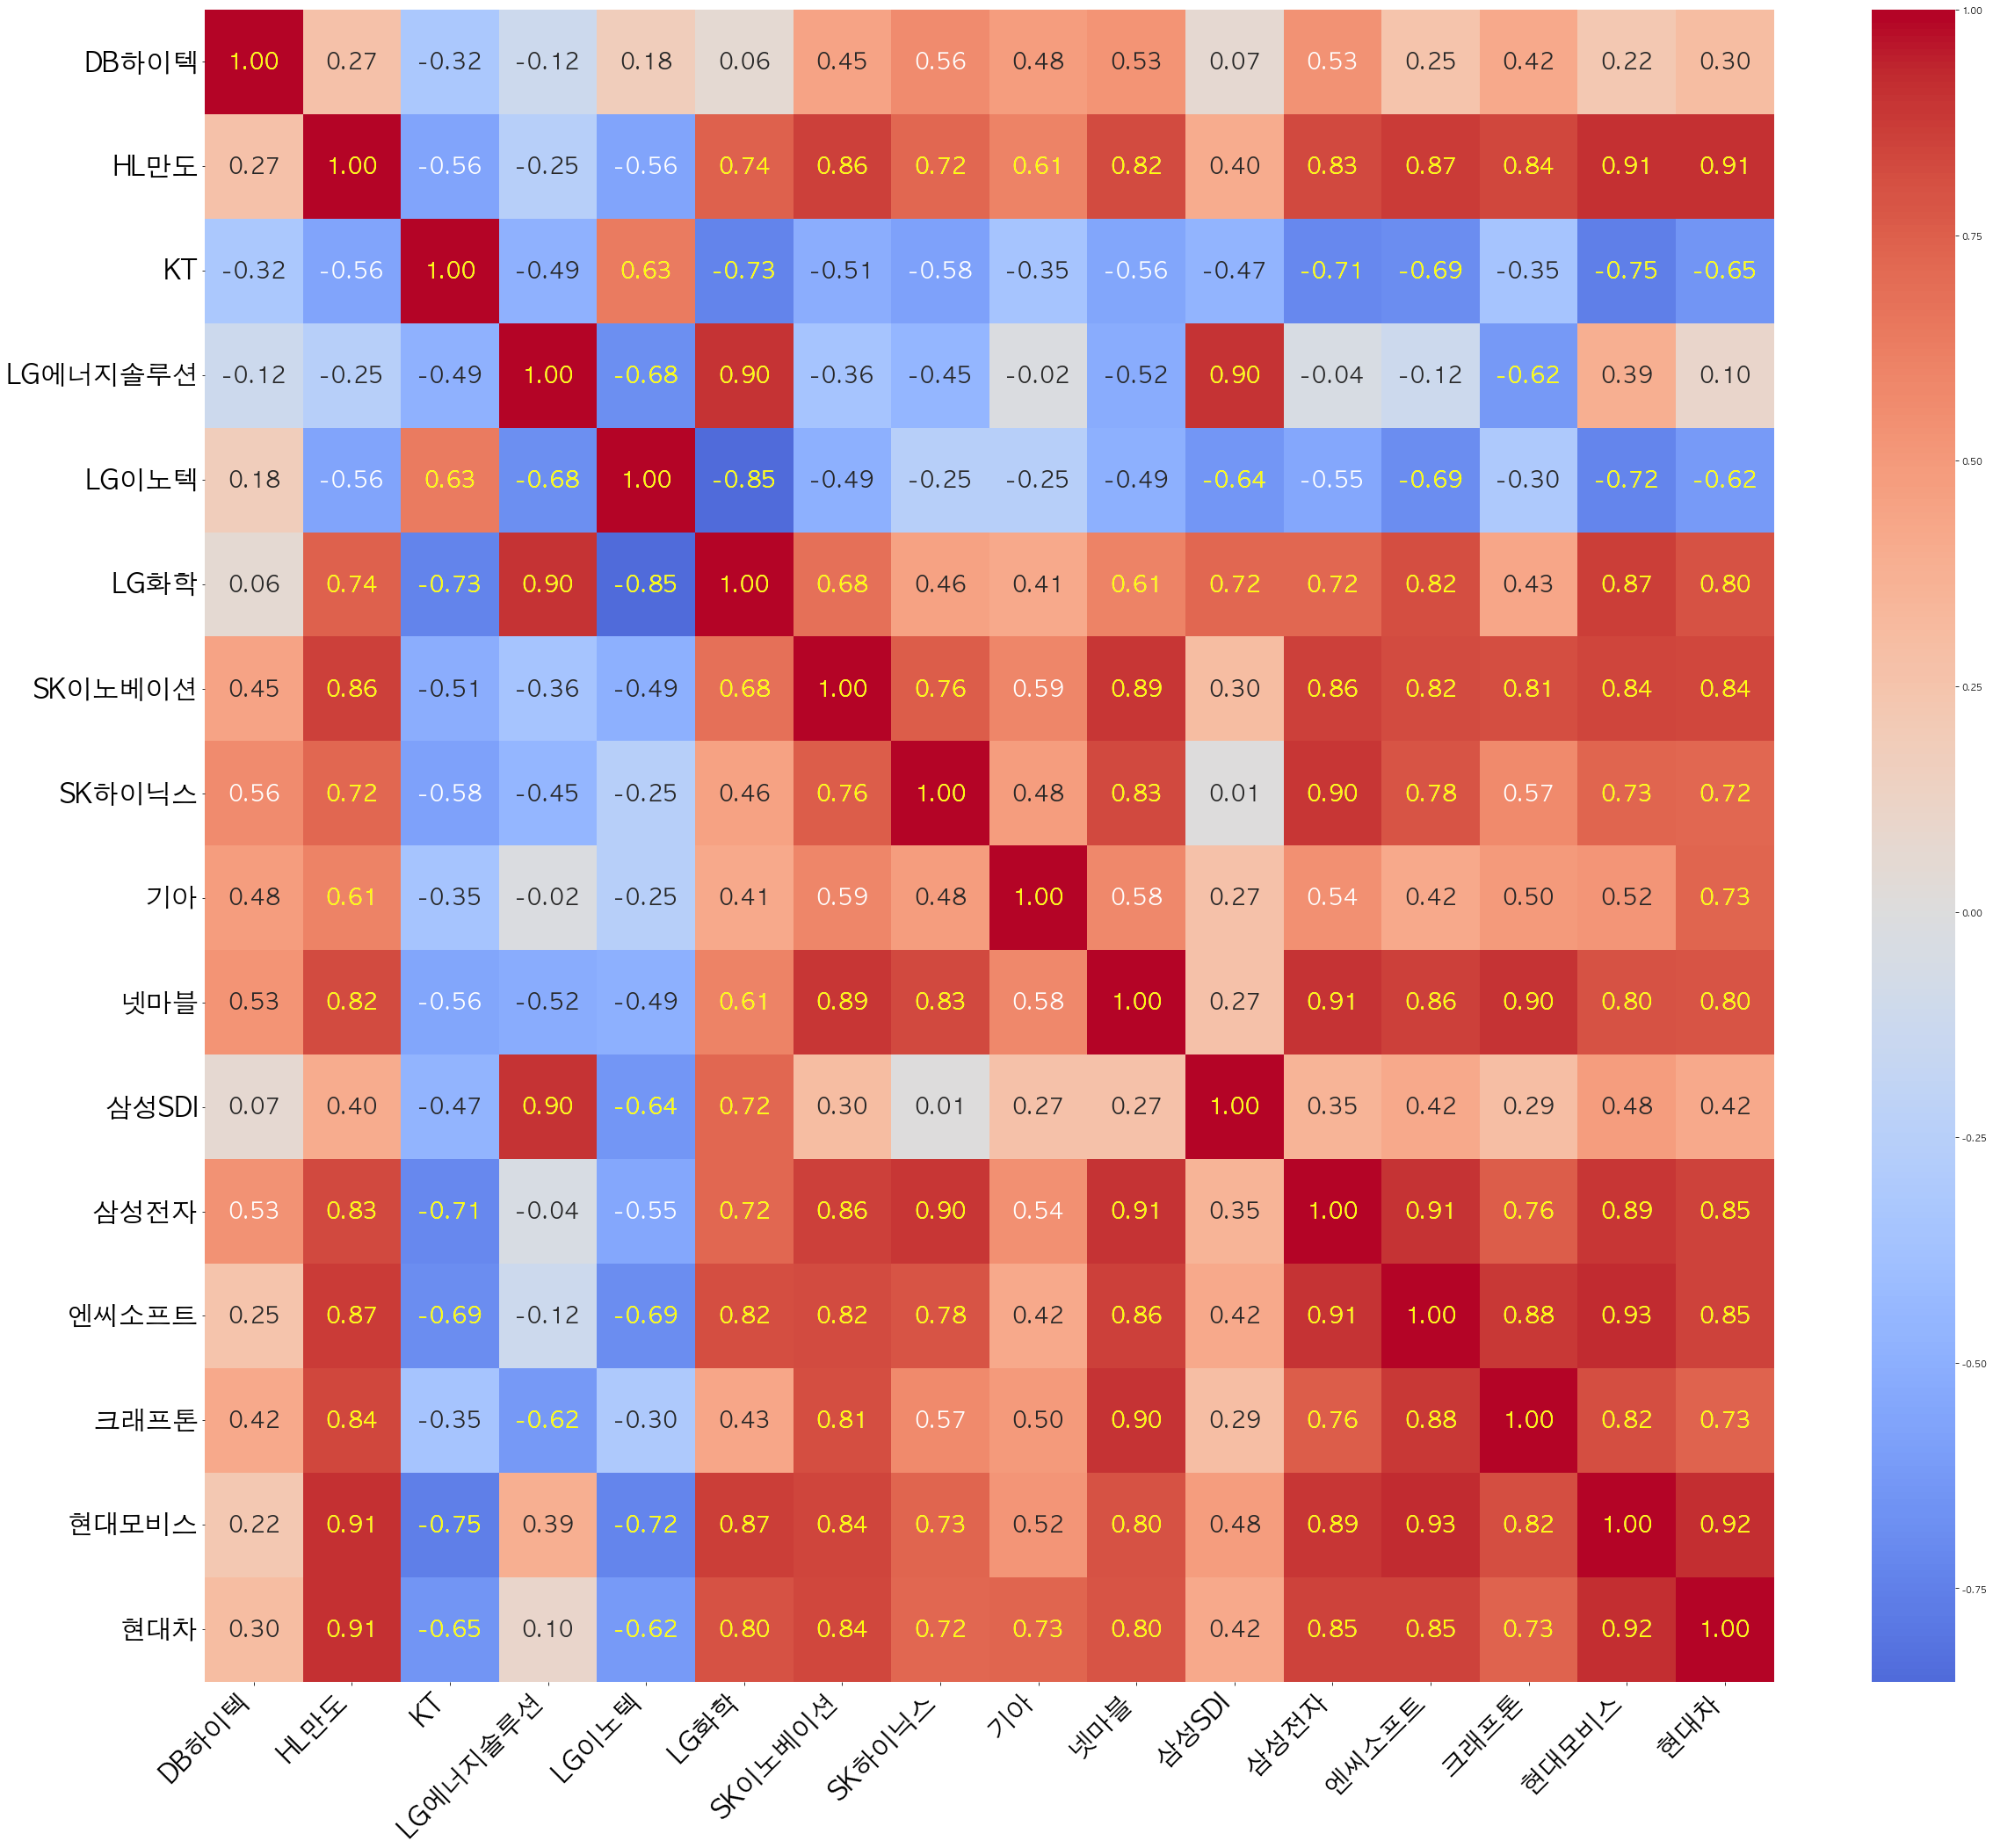

In [83]:
# 상관계수가 0.6을 초과하는 경우에만 진한 색상으로 표시하는 마스크 생성
# mask = np.triu(corr_matrix >= 0.6)

# 히트맵 크기 설정
plt.figure(figsize=(40, 35))

# 히트맵 그리기
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
           annot_kws={'fontsize': 25}, center=0)


# 상관계수가 0.6 이상인 부분 글씨를 노란색으로 설정
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.6:
            ax.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr_matrix.iloc[i, j]),
                    ha='center', va='center', color='yellow', fontsize=25)


# 주식 이름의 글씨 기울이기
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30)


# 그래프 출력
plt.show()

# 그래프 출력 및 이미지로 저장
fig = ax.get_figure()
fig.savefig('heatmap.png', dpi=300)


In [80]:
# 그래프 출력 및 이미지로 저장
plt.savefig('heatmap.png')

<Figure size 432x288 with 0 Axes>